In [1]:
#https://www.kaggle.com/utkukubilay/titanic-eda-knn-model

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import accuracy_score
from sklearn import metrics

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanicknn/custom.css
/kaggle/input/titanicknn/__notebook__.ipynb
/kaggle/input/titanicknn/__results__.html
/kaggle/input/titanicknn/__output__.json
/kaggle/input/titanicknn/submission.csv
/kaggle/input/titanicknn/__results___files/__results___3_2.png
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titaniccleaningfeatureengineering/cleaned_train.csv
/kaggle/input/titaniccleaningfeatureengineering/cleaned_test.csv
/kaggle/input/titaniccleaningfeatureengineering/custom.css
/kaggle/input/titaniccleaningfeatureengineering/__notebook__.ipynb
/kaggle/input/titaniccleaningfeatureengineering/__results__.html
/kaggle/input/titaniccleaningfeatureengineering/__output__.json
/kaggle/input/titaniccleaningfeatureengineering/test_withFeatures.csv
/kaggle/input/titaniccleaningfeatureengineering/train_withFeatures.csv
/kaggle/input/titaniccleaningfeatureengineering/__results___files/__results___21_0.png
/kaggle/input

In [2]:
# cleaned dataset
train = pd.read_csv('../input/titaniccleaningfeatureengineering/train_withFeatures.csv')
test = pd.read_csv('../input/titaniccleaningfeatureengineering/test_withFeatures.csv')
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
sc = MinMaxScaler()
#X = train[train.columns[1:]]
X = sc.fit_transform(train[train.columns[1:]])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

1 test accuracy:       0.81
2 test accuracy:       0.81
3 test accuracy:       0.85
4 test accuracy:       0.83
5 test accuracy:       0.84
6 test accuracy:       0.82
7 test accuracy:       0.83
8 test accuracy:       0.83
9 test accuracy:       0.83
10 test accuracy:       0.84
11 test accuracy:       0.84
12 test accuracy:       0.83
13 test accuracy:       0.84
14 test accuracy:       0.83
15 test accuracy:       0.82
16 test accuracy:       0.82
17 test accuracy:       0.82
18 test accuracy:       0.82
19 test accuracy:       0.82
20 test accuracy:       0.80
21 test accuracy:       0.80
22 test accuracy:       0.81
23 test accuracy:       0.81
24 test accuracy:       0.80
25 test accuracy:       0.80
26 test accuracy:       0.80
27 test accuracy:       0.82
28 test accuracy:       0.82
29 test accuracy:       0.80
30 test accuracy:       0.83
31 test accuracy:       0.83
32 test accuracy:       0.83
33 test accuracy:       0.83
34 test accuracy:       0.83
35 test accuracy:      

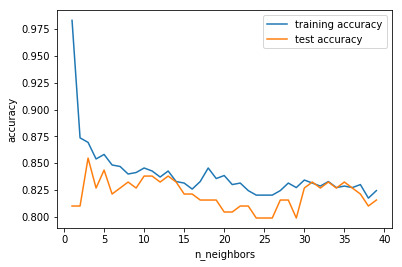

In [4]:
training_accuracies = [] 
test_accuracies = []  
neighbors_settings = range(1, 40)

for n_neighbors in neighbors_settings: 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train) 
    # record training set accuracy 
    training_accuracies.append(clf.score(X_train, y_train)) 
    # record generalization accuracy
    test_accuracy = clf.score(X_test, y_test)
    test_accuracies.append(test_accuracy)
    print("{} test accuracy: {:10.2f}".format(n_neighbors,test_accuracy))

# check the accuracy difference between train and test data     
plt.plot(neighbors_settings, training_accuracies, label="training accuracy")
plt.plot(neighbors_settings, test_accuracies, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

In [5]:
# predict for submission
logreg = KNeighborsClassifier(n_neighbors = 32, metric = 'minkowski', p = 2)
logreg.fit(X_train, y_train)

test = sc.fit_transform(test)

submission['Survived'] = logreg.predict(test)
submission.to_csv("submission.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
